<a href="https://colab.research.google.com/github/SaddiManisha/heart_failure_perdiction_ML/blob/main/Heart_failure_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the data

In [ ]:
# Download latest version
path = kagglehub.dataset_download("aadarshvelu/heart-failure-prediction-clinical-records")

print("Path to dataset files:", path)

100%|██████████| 28.6k/28.6k [00:00<00:00, 31.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aadarshvelu/heart-failure-prediction-clinical-records/versions/1


In [ ]:
hr_df = pd.read_csv(path + "/heart_failure_clinical_records.csv")

In [ ]:
hr_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Analysis

In [ ]:
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [ ]:
display(hr_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,5000.0,60.288736,11.697243,40.0,50.0,60.00,68.0,95.0
anaemia,5000.0,0.474400,0.499394,0.0,0.0,0.00,1.0,1.0
creatinine_phosphokinase,5000.0,586.760600,976.733979,23.0,121.0,248.00,582.0,7861.0
diabetes,5000.0,0.439400,0.496364,0.0,0.0,0.00,1.0,1.0
ejection_fraction,5000.0,37.734600,11.514855,14.0,30.0,38.00,45.0,80.0
high_blood_pressure,5000.0,0.364800,0.481422,0.0,0.0,0.00,1.0,1.0
platelets,5000.0,265075.404370,97999.758622,25100.0,215000.0,263358.03,310000.0,850000.0
serum_creatinine,5000.0,1.369106,1.009750,0.5,0.9,1.10,1.4,9.4
serum_sodium,5000.0,136.808200,4.464236,113.0,134.0,137.00,140.0,148.0
sex,5000.0,0.645600,0.478379,0.0,0.0,1.00,1.0,1.0


In [ ]:
print(hr_df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
print("Duplicate rows:", hr_df.duplicated().sum())

Duplicate rows: 3680


In [ ]:
print(hr_df['DEATH_EVENT'].value_counts())

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64


/tmp/ipython-input-2932848481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=hr_df['DEATH_EVENT'], palette="Set2")


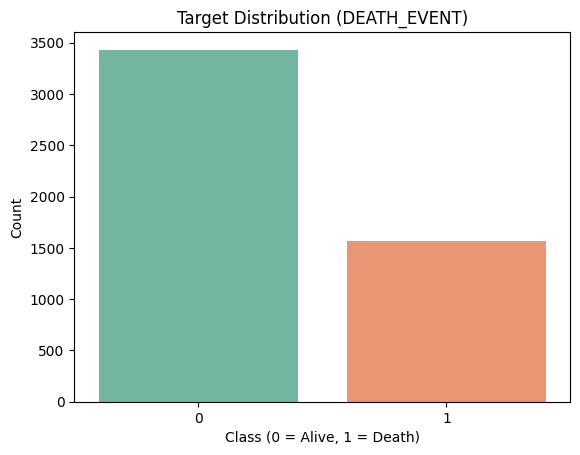

In [ ]:
# Plot
sns.countplot(x=hr_df['DEATH_EVENT'], palette="Set2")
plt.title("Target Distribution (DEATH_EVENT)")
plt.xlabel("Class (0 = Alive, 1 = Death)")
plt.ylabel("Count")
plt.show()

In [ ]:
num_cols = hr_df.select_dtypes(include=[np.number]).columns.tolist()

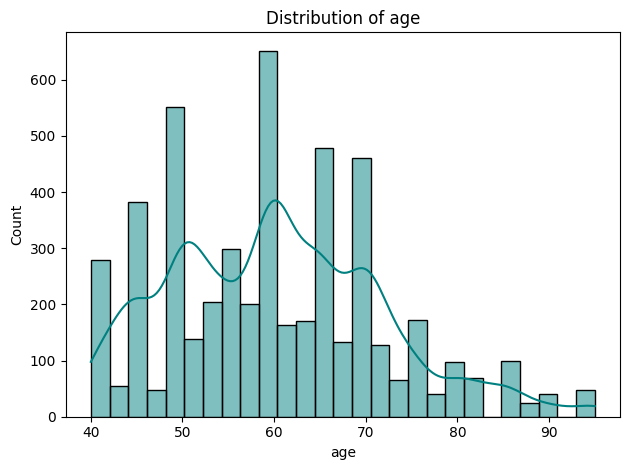

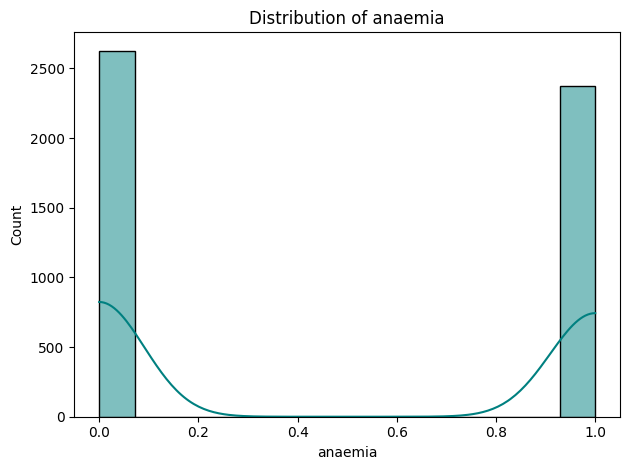

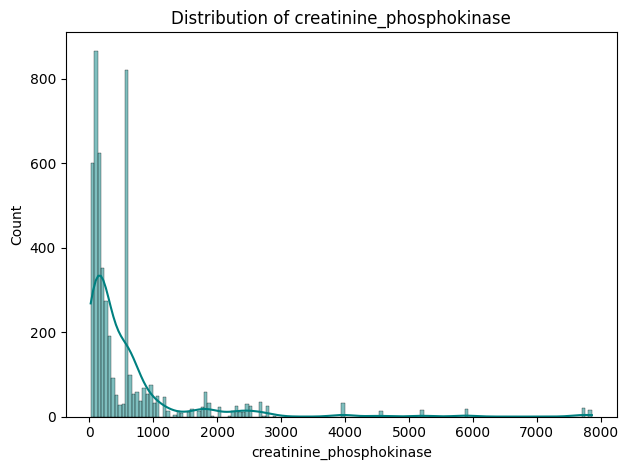

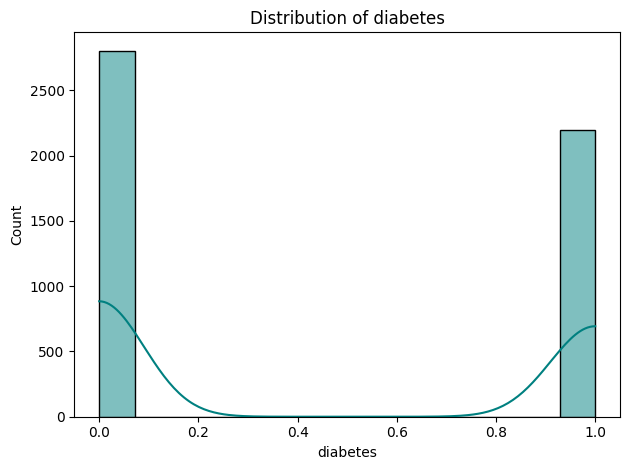

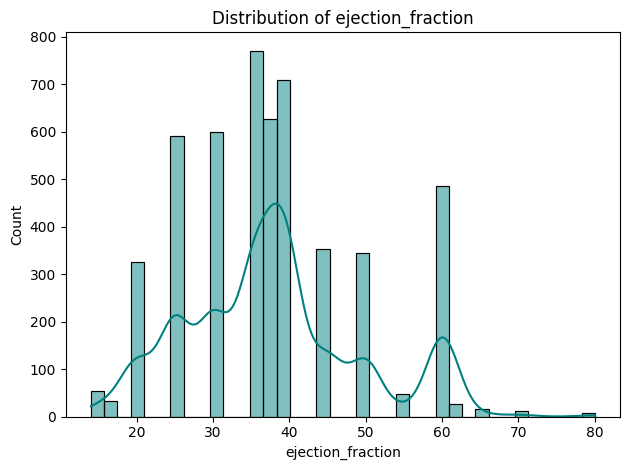

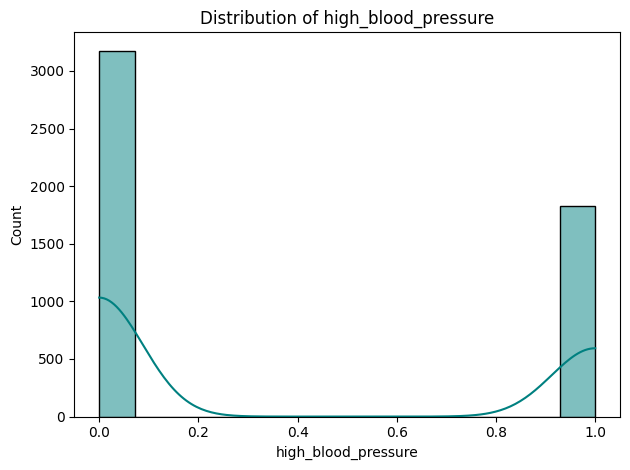

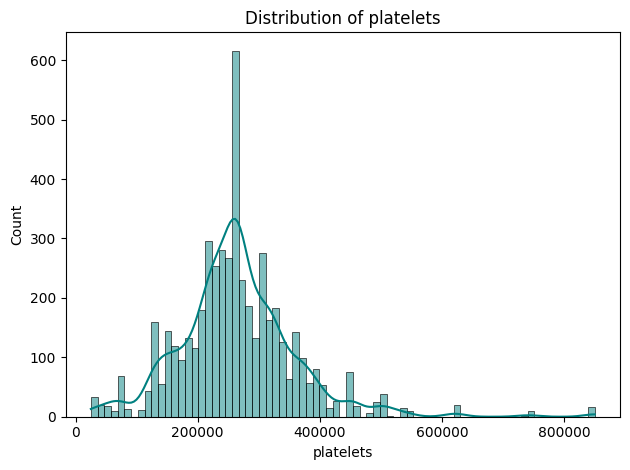

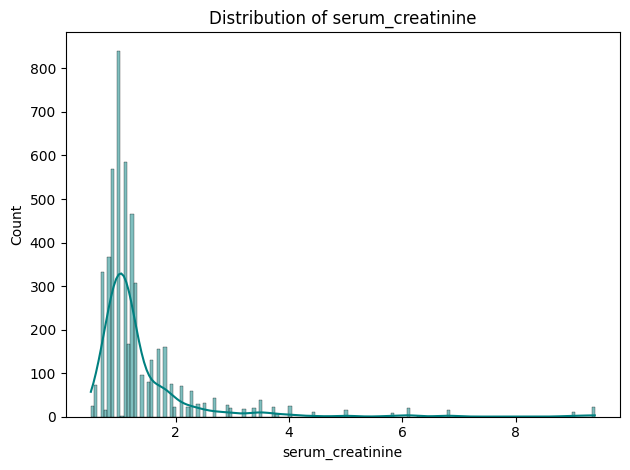

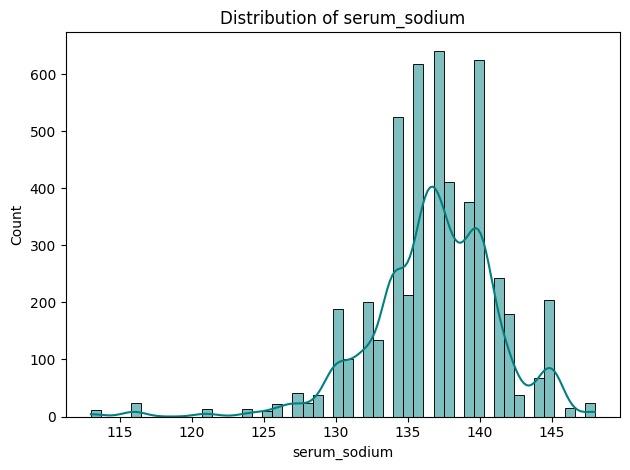

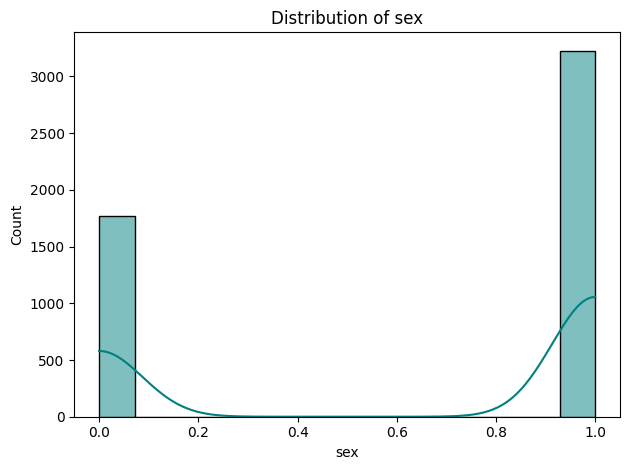

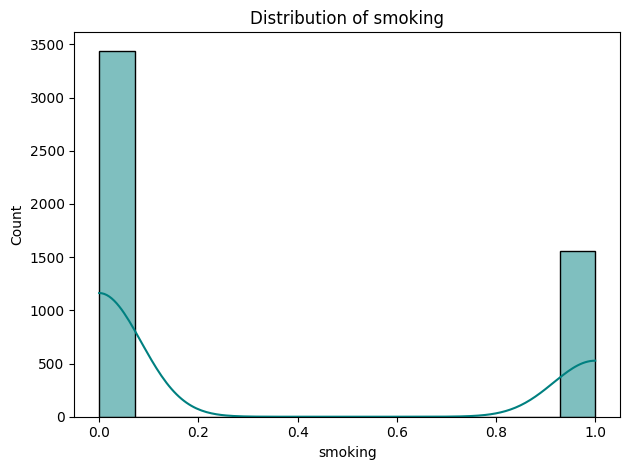

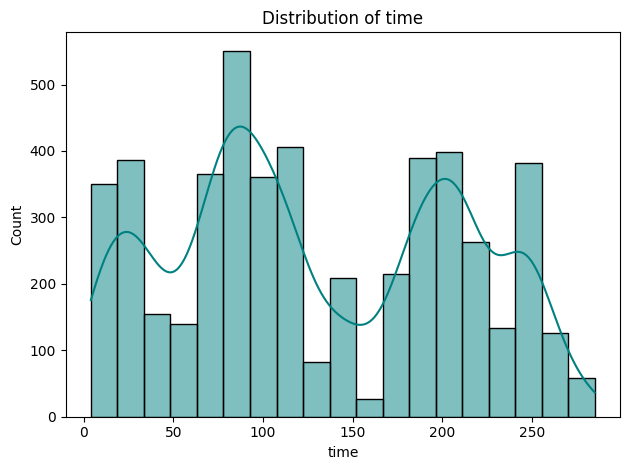

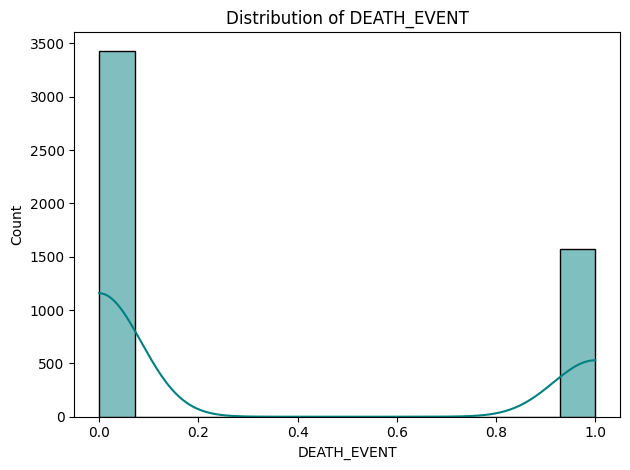

In [ ]:
# Distributions of numeric features
for col in num_cols:
    sns.histplot(hr_df[col], kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Split into train and test sets

In [ ]:
X = hr_df.drop("DEATH_EVENT", axis=1)
y = hr_df["DEATH_EVENT"]

print("Data separated: Features (X) and Target (y)")
print("X shape:", X.shape)
print("y shape:", y.shape)

Data separated: Features (X) and Target (y)
X shape: (5000, 12)
y shape: (5000,)


In [17]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split completed.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Data split completed.
Train shape: (4000, 12)
Test shape: (1000, 12)


# Model Implementation

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       686
           1       0.74      0.67      0.70       314

    accuracy                           0.82      1000
   macro avg       0.80      0.78      0.79      1000
weighted avg       0.82      0.82      0.82      1000



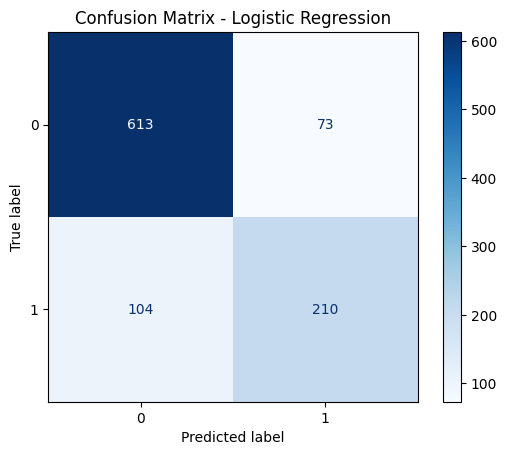

In [ ]:
# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix plot
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       686
           1       0.92      0.94      0.93       314

    accuracy                           0.96      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000



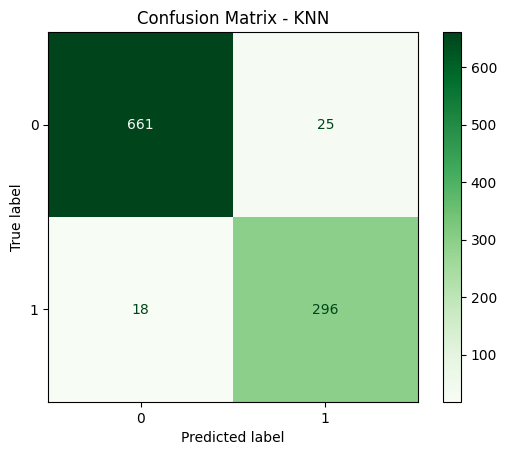

In [ ]:
# Train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors - Classification Report")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix plot
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.show()